In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd

from dynamic_factor import DynamicFactor

from sktime.utils._testing.series import _make_series
from sktime.forecasting.tests._config import TEST_FHS
from sktime.utils.estimator_checks import check_estimator

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

## Tests

In [3]:
%%capture
results = check_estimator(DynamicFactor)

2022-07-26 19:42:45.366433: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-26 19:42:45.367988: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-26 19:42:51.717417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-26 19:42:51.717489: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-26 19:42:51.717508: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-AT55D56E): /proc/driver/nvidia/version does not exist
2022-07-26 19:42:51.724797: I tensorflow/core/platform/cpu_fe

In [4]:
[f"fh={fh}" for fh in TEST_FHS]

['fh=1', 'fh=[2 5]', 'fh=-3', 'fh=[-2 -5]', 'fh=0', 'fh=[-3  2]']

In [5]:
correct_fixtures = [key for key, value in results.items() if value == "PASSED"]
correct_fixtures

['test_clone[DynamicFactor]',
 'test_constructor[DynamicFactor]',
 'test_create_test_instance[DynamicFactor]',
 'test_create_test_instances_and_names[DynamicFactor]',
 'test_estimator_tags[DynamicFactor]',
 'test_fit_does_not_overwrite_hyper_params[DynamicFactor-ForecasterFitPredictMultivariateNoX]',
 'test_fit_idempotent[DynamicFactor-ForecasterFitPredictMultivariateNoX-predict]',
 'test_fit_idempotent[DynamicFactor-ForecasterFitPredictMultivariateNoX-predict_var]',
 'test_fit_idempotent[DynamicFactor-ForecasterFitPredictMultivariateNoX-predict_proba]',
 'test_fit_returns_self[DynamicFactor-ForecasterFitPredictMultivariateNoX]',
 'test_fit_updates_state[DynamicFactor-ForecasterFitPredictMultivariateNoX]',
 'test_get_params[DynamicFactor]',
 'test_has_common_interface[DynamicFactor]',
 'test_inheritance[DynamicFactor]',
 'test_methods_do_not_change_state[DynamicFactor-ForecasterFitPredictMultivariateNoX-predict]',
 'test_methods_do_not_change_state[DynamicFactor-ForecasterFitPredictMul

In [6]:
wrong_fixtures = [key for key, value in results.items() if value != "PASSED"]
wrong_fixtures

['test_predict_quantiles[DynamicFactor-fh=1-alpha=0.05]',
 'test_predict_quantiles[DynamicFactor-fh=1-alpha=0.1]',
 'test_predict_quantiles[DynamicFactor-fh=[2 5]-alpha=0.05]',
 'test_predict_quantiles[DynamicFactor-fh=[2 5]-alpha=0.1]']

In [7]:
for key in wrong_fixtures:
    print(f"Key: {key} \n Test result: {results[key]}")

Key: test_predict_quantiles[DynamicFactor-fh=1-alpha=0.05] 
 Test result: Lengths must match to compare
Key: test_predict_quantiles[DynamicFactor-fh=1-alpha=0.1] 
 Test result: Lengths must match to compare
Key: test_predict_quantiles[DynamicFactor-fh=[2 5]-alpha=0.05] 
 Test result: Lengths must match to compare
Key: test_predict_quantiles[DynamicFactor-fh=[2 5]-alpha=0.1] 
 Test result: Lengths must match to compare


It seems like we have the same error message throughout. The index generated by `_predict` is different from the test function. However, this does not happen for all the values of `fh`.

In [2]:
check_estimator(
    DynamicFactor,
    fixtures_to_run="test_predict_quantiles[DynamicFactor-fh=[2 5]-alpha=0.05]",
    return_exceptions=False,
)

expected columns: MultiIndex([(0, 0.05),
            (1, 0.05)],
           )
found columns: Index([(0, 0.05)], dtype='object')


ValueError: Lengths must match to compare

## Practical Example

In [3]:
y = _make_series(n_timepoints=50, n_columns=2)
X = _make_series(n_timepoints=55, n_columns=1)

In [4]:
print(y.shape)
print(X.shape)

(50, 2)
(55,)


In [5]:
X_train, X_test = X.iloc[: len(y)], X.iloc[len(y) :]

In [6]:
y.columns = ["GDP", "Industrial Production"]

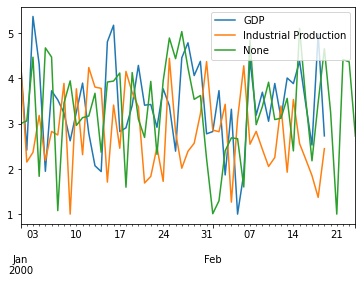

In [7]:
y.plot()
X.plot()
plt.legend()

In [8]:
model = DynamicFactor()

In [9]:
model.fit(y)

DynamicFactor()

In [10]:
model.predict(fh=[1, 2, 3])

,GDP,Industrial Production
2000-02-20,3.361011,2.746722
2000-02-21,3.360836,2.746579
2000-02-22,3.360660,2.746436


In [11]:
y.shape

(50, 2)

In [12]:
model.predict_interval(fh=[1, 2, 3], coverage=[0.9])

GDP           Industrial Production          
        0.9                             0.9          
      lower     upper                 lower     upper
0  3.238407  3.483614              2.637373  2.856071
1  3.238174  3.483497              2.637186  2.855972
2  3.237940  3.483381              2.636999  2.855873

In [13]:
model.predict_quantiles(fh=[1, 2, 3], alpha=[0.9])

,GDP
,0.9
0,3.608192
1,3.608135
2,3.608078
